In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_excel('sales.xlsx')
sales

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
3,12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
4,11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
7004,23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
7005,5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0
7006,16577,2020-09-01 00:00:00,49.0,20.0,200,90.0,160.0,0.0,14.0,1,3,2,2,8,1


In [3]:
sales.set_index ('CustomerID', inplace = True)

In [4]:
#check for duplicates 
#sales [sales.duplicated()]
sales.drop_duplicates(inplace= True)

In [5]:
sales.shape

(7000, 14)

INFO : 6 float variables;
8 integer variables;
1 object variable

In [6]:
#Impute MntDrinks

sales_products = sales[['MntDrinks','MntDesserts','MntEntries','MntVegan&Vegetarian']] # we are using this variables to impute in drinks because they have a corr>0.7

imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(sales_products) # this is an array
sales_products = pd.DataFrame(array_impute, columns = sales_products.columns)

sales['MntDrinks'] = sales_products['MntDrinks'].values

In [7]:
#Input recency com a média
sales.fillna({'Recency': sales['Recency'].mean}, inplace = True)

In [8]:
#sales.isna().sum()

In [9]:
sales

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0


In [10]:
df_mnt_pre_normalize=sales[['MntMeat&Fish','MntEntries','MntVegan&Vegetarian','MntDrinks','MntDesserts','MntAdditionalRequests']].copy()

In [11]:
df_mnt_pre_normalize

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests
CustomerID,,,,,,
11054,7230.0,1820,3435.0,1600.0,440.0,57.0
17117,5850.0,320,2745.0,500.0,320.0,8.0
31751,8380.0,0,1560.0,0.0,0.0,28.0
12947,5090.0,280,2355.0,140.0,560.0,78.0
11402,330.0,0,240.0,0.0,0.0,7.0
...,...,...,...,...,...,...
23699,290.0,20,180.0,0.0,40.0,4.0
23255,230.0,80,525.0,20.0,80.0,23.0
5798,3050.0,2460,3840.0,1800.0,980.0,107.0


In [17]:
# MINMAX NORMALIZATION
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler object
scaler = MinMaxScaler()

# Apply scaler to the data in the data frame
df_mnt = pd.DataFrame(scaler.fit_transform(df_mnt_pre_normalize), columns=df_mnt_pre_normalize.columns)

# View the normalized data frame
df_mnt.head()

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests
0,0.482644,0.457286,0.132248,0.402010,0.110553,0.228916
1,0.390521,0.080402,0.105683,0.125628,0.080402,0.032129
2,0.559413,0.000000,0.060060,0.000000,0.000000,0.112450
3,0.339786,0.070352,0.090668,0.035176,0.140704,0.313253
4,0.022029,0.000000,0.009240,0.000000,0.000000,0.028112


In [18]:
from sklearn.cluster import KMeans

In [19]:
# DO IT
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_mnt)
    inertias.append(model.inertia_)

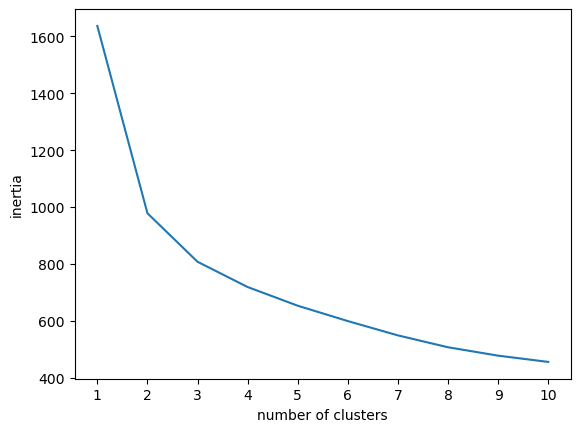

In [20]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [21]:
df_mnt.corr()

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests
MntMeat&Fish,1.000000,0.391166,0.475275,0.389256,0.405025,0.383335
MntEntries,0.391166,1.000000,0.458884,0.558761,0.566151,0.371052
MntVegan&Vegetarian,0.475275,0.458884,1.000000,0.459858,0.457396,0.289569
MntDrinks,0.389256,0.558761,0.459858,1.000000,0.550678,0.380607
MntDesserts,0.405025,0.566151,0.457396,0.550678,1.000000,0.374886
MntAdditionalRequests,0.383335,0.371052,0.289569,0.380607,0.374886,1.000000


In [22]:
df_mnt_k3 = df_mnt.copy()
model_k3 = KMeans(n_clusters=3, random_state = 100).fit(df_mnt)

In [23]:
model_k3

KMeans(n_clusters=3, random_state=100)

In [24]:
# DO IT
df_mnt_k3['k3 cluster'] = model_k3.labels_

In [25]:
#DO IT
df_mnt_k3.groupby(['k3 cluster']).mean().transpose()

k3 cluster,0,1,2
MntMeat&Fish,0.057958,0.439580,0.356100
MntEntries,0.035636,0.143742,0.427695
MntVegan&Vegetarian,0.038013,0.158748,0.254008
MntDrinks,0.035872,0.142647,0.444428
MntDesserts,0.035447,0.139791,0.441475
MntAdditionalRequests,0.072634,0.280178,0.332037


In [26]:
#DO IT
descr3 = df_mnt_k3.groupby(['k3 cluster']).describe().transpose()
descr3

k3 cluster                             0            1            2
MntMeat&Fish          count  4009.000000  1696.000000  1295.000000
                      mean      0.057958     0.439580     0.356100
                      std       0.075531     0.205176     0.197565
                      min       0.000000     0.007343     0.006676
                      25%       0.006676     0.282877     0.207944
                      50%       0.022697     0.418558     0.325768
                      75%       0.086115     0.572263     0.473965
                      max       0.411883     1.000000     0.996662
MntEntries            count  4009.000000  1696.000000  1295.000000
                      mean      0.035636     0.143742     0.427695
                      std       0.057648     0.125244     0.254320
                      min       0.000000     0.000000     0.000000
                      25%       0.005025     0.050251     0.205025
                      50%       0.015075     0.115578     0.402010
                      75%       0.040201     0.211055     0.608040
                      max       0.592965     0.748744     1.000000
MntVegan&Vegetarian   count  4009.000000  1696.000000  1295.000000
                      mean      0.038013     0.158748     0.254008
                      std       0.119899     0.120205     0.138388
                      min       0.000000     0.004620     0.025410
                      25%       0.005198     0.069156     0.137734
                      50%       0.011550     0.120409     0.239085
                      75%       0.030608     0.217718     0.352275
                      max       1.000000     0.980769     0.576923
MntDrinks             count  4009.000000  1696.000000  1295.000000
                      mean      0.035872     0.142647     0.444428
                      std       0.058582     0.127729     0.252343
                      min       0.000000     0.000000     0.000000
                      25%       0.005025     0.045226     0.236181
                      50%       0.015075     0.114322     0.422111
                      75%       0.040201     0.211055     0.633166
                      max       0.592965     0.693467     1.000000
MntDesserts           count  4009.000000  1696.000000  1295.000000
                      mean      0.035447     0.139791     0.441475
                      std       0.055786     0.124704     0.254966
                      min       0.000000     0.000000     0.000000
                      25%       0.005025     0.045226     0.226131
                      50%       0.015075     0.105528     0.427136
                      75%       0.040201     0.202261     0.638191
                      max       0.597990     0.708543     1.000000
MntAdditionalRequests count  4009.000000  1696.000000  1295.000000
                      mean      0.072634     0.280178     0.332037
                      std       0.079916     0.225504     0.238981
                      min       0.000000     0.000000     0.000000
                      25%       0.016064     0.108434     0.140562
                      50%       0.044177     0.210843     0.265060
                      75%       0.096386     0.401606     0.481928
                      max       0.550201     1.000000     1.000000

In [27]:
df_mnt_k2 = df_mnt.copy()
model_k2 = KMeans(n_clusters=2, random_state = 100).fit(df_mnt)

In [28]:
# DO IT
df_mnt_k2['k2'] = model_k2.labels_

In [29]:
#DO IT
df_mnt_k2.groupby(['k2']).mean().transpose()

k2,0,1
MntMeat&Fish,0.098489,0.412131
MntEntries,0.040450,0.315497
MntVegan&Vegetarian,0.044634,0.227953
MntDrinks,0.040604,0.323887
MntDesserts,0.040291,0.320151
MntAdditionalRequests,0.092879,0.321416


In [30]:
#DO IT
descr2 = df_mnt_k2.groupby(['k2']).describe().transpose()
descr2

k2                                     0            1
MntMeat&Fish          count  4610.000000  2390.000000
                      mean      0.098489     0.412131
                      std       0.136900     0.217566
                      min       0.000000     0.006676
                      25%       0.008011     0.248331
                      50%       0.030708     0.386182
                      75%       0.137517     0.564586
                      max       0.778371     1.000000
MntEntries            count  4610.000000  2390.000000
                      mean      0.040450     0.315497
                      std       0.060866     0.240435
                      min       0.000000     0.000000
                      25%       0.005025     0.125628
                      50%       0.018090     0.251256
                      75%       0.050251     0.457286
                      max       0.592965     1.000000
MntVegan&Vegetarian   count  4610.000000  2390.000000
                      mean      0.044634     0.227953
                      std       0.116054     0.134981
                      min       0.000000     0.006930
                      25%       0.005775     0.117810
                      50%       0.015015     0.202125
                      75%       0.043168     0.323256
                      max       1.000000     0.576923
MntDrinks             count  4610.000000  2390.000000
                      mean      0.040604     0.323887
                      std       0.062214     0.244745
                      min       0.000000     0.000000
                      25%       0.005025     0.126759
                      50%       0.015075     0.261307
                      75%       0.050251     0.462312
                      max       0.592965     1.000000
MntDesserts           count  4610.000000  2390.000000
                      mean      0.040291     0.320151
                      std       0.059623     0.246102
                      min       0.000000     0.000000
                      25%       0.005025     0.120603
                      50%       0.015075     0.256281
                      75%       0.050251     0.481156
                      max       0.567839     1.000000
MntAdditionalRequests count  4610.000000  2390.000000
                      mean      0.092879     0.321416
                      std       0.110797     0.241642
                      min       0.000000     0.000000
                      25%       0.020080     0.129518
                      50%       0.052209     0.244980
                      75%       0.120482     0.469880
                      max       0.927711     1.000000

In [31]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k3.MntMeat&Fish, df_mnt_k3.MntDrinks, c=df_mnt_k3k3 cluster)
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 3 clusters')
plt.show()

SyntaxError: invalid syntax (3698658096.py, line 3)

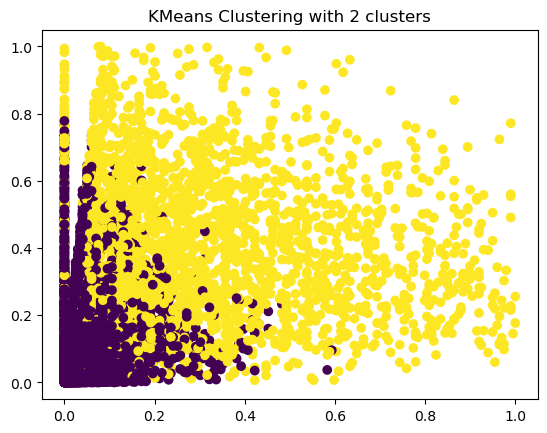

In [32]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k2['MntEntries'], df_mnt_k2['MntMeat&Fish'], c=df_mnt_k2['k2'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

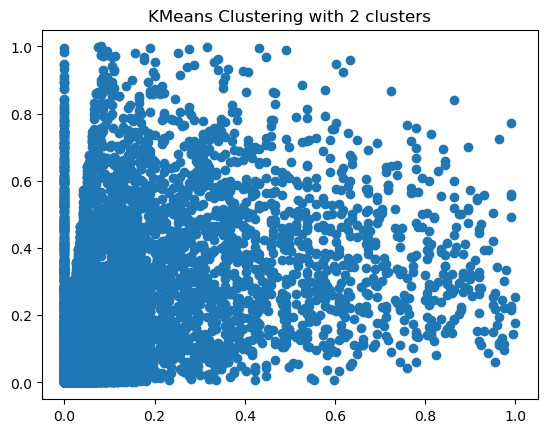

In [33]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt['MntEntries'], df_mnt['MntMeat&Fish'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

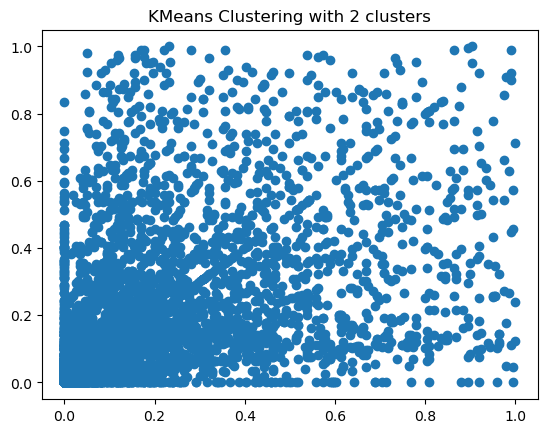

In [34]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k2['MntDrinks'], df_mnt_k2['MntEntries'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

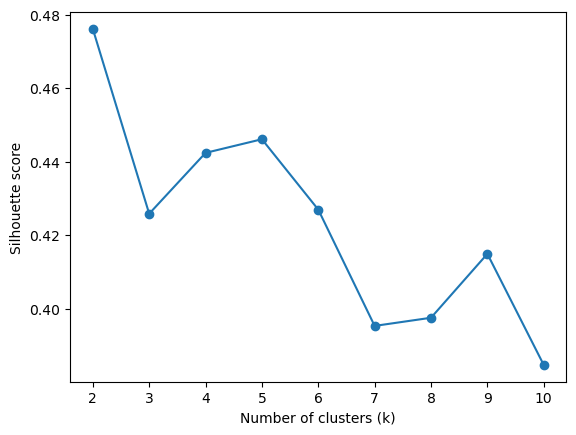

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a list to store silhouette scores for different values of k
silhouette_scores = []

# Fit k-means clustering for different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_mnt)
    score = silhouette_score(df_mnt, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for different values of k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()


In [36]:
df_mnt_k4 = df_mnt.copy()
model_k4 = KMeans(n_clusters=4, random_state = 100).fit(df_mnt)

In [37]:
# DO IT
df_mnt_k4['k4'] = model_k4.labels_

In [38]:
#DO IT
df_mnt_k4.groupby(['k4']).mean().transpose()

k4,0,1,2,3
MntMeat&Fish,0.059052,0.298463,0.493163,0.356439
MntEntries,0.035186,0.187605,0.155749,0.464900
MntVegan&Vegetarian,0.036478,0.152907,0.185352,0.257226
MntDrinks,0.035288,0.208940,0.161450,0.463067
MntDesserts,0.035478,0.189748,0.149175,0.480990
MntAdditionalRequests,0.072971,0.598042,0.161728,0.277244


In [39]:
descr4 = df_mnt_k4.groupby(['k4']).describe().transpose()
descr4

k4                                     0           1            2            3
MntMeat&Fish          count  4008.000000  696.000000  1289.000000  1007.000000
                      mean      0.059052    0.298463     0.493163     0.356439
                      std       0.076604    0.192136     0.191342     0.190194
                      min       0.000000    0.005340     0.044126     0.006676
                      25%       0.006676    0.156041     0.358478     0.216288
                      50%       0.022697    0.264352     0.471963     0.327770
                      75%       0.089453    0.404206     0.618158     0.473298
                      max       0.387183    0.991989     1.000000     0.988652
MntEntries            count  4008.000000  696.000000  1289.000000  1007.000000
                      mean      0.035186    0.187605     0.155749     0.464900
                      std       0.056122    0.165623     0.135658     0.257803
                      min       0.000000    0.000000     0.000000     0.000000
                      25%       0.005025    0.065327     0.055276     0.251256
                      50%       0.015075    0.140704     0.125628     0.447236
                      75%       0.040201    0.271357     0.221106     0.663317
                      max       0.592965    0.964824     0.768844     1.000000
MntVegan&Vegetarian   count  4008.000000  696.000000  1289.000000  1007.000000
                      mean      0.036478    0.152907     0.185352     0.257226
                      std       0.114118    0.122758     0.138238     0.138118
                      min       0.000000    0.006930     0.004620     0.031185
                      25%       0.005198    0.063458     0.081428     0.143798
                      50%       0.011550    0.110591     0.144953     0.245438
                      75%       0.030608    0.207178     0.258720     0.354297
                      max       1.000000    0.564218     0.992088     0.576923
MntDrinks             count  4008.000000  696.000000  1289.000000  1007.000000
                      mean      0.035288    0.208940     0.161450     0.463067
                      std       0.056943    0.190650     0.150618     0.257838
                      min       0.000000    0.000000     0.000000     0.000000
                      25%       0.005025    0.065327     0.050251     0.251256
                      50%       0.015075    0.150754     0.120603     0.442211
                      75%       0.040201    0.301508     0.231156     0.663317
                      max       0.592965    0.944724     0.989950     1.000000
MntDesserts           count  4008.000000  696.000000  1289.000000  1007.000000
                      mean      0.035478    0.189748     0.149175     0.480990
                      std       0.055840    0.171196     0.133962     0.255731
                      min       0.000000    0.000000     0.000000     0.000000
                      25%       0.005025    0.060302     0.050251     0.266332
                      50%       0.015075    0.135678     0.115578     0.482412
                      75%       0.040327    0.276382     0.226131     0.688442
                      max       0.597990    0.944724     0.708543     1.000000
MntAdditionalRequests count  4008.000000  696.000000  1289.000000  1007.000000
                      mean      0.072971    0.598042     0.161728     0.277244
                      std       0.077970    0.181343     0.108371     0.196955
                      min       0.000000    0.232932     0.000000     0.000000
                      25%       0.016466    0.449799     0.076305     0.128514
                      50%       0.044177    0.566265     0.140562     0.224900
                      75%       0.100402    0.730924     0.228916     0.375502
                      max       0.445783    1.000000     0.642570     1.000000

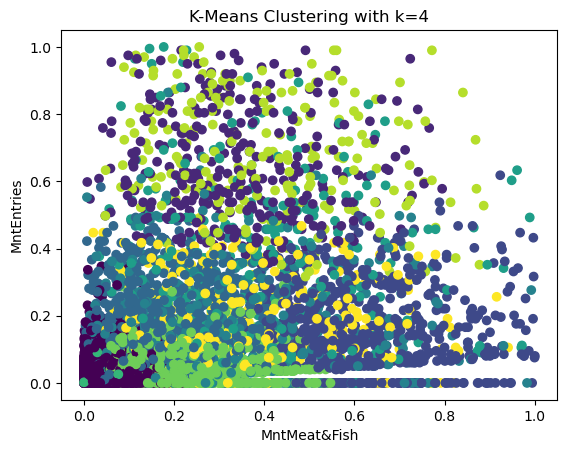

In [40]:
import matplotlib.pyplot as plt

# Select two variables to plot
x_var = 'MntMeat&Fish'
y_var = 'MntEntries'

# Create scatter plot with color-coded clusters
plt.scatter(df_mnt[x_var], df_mnt[y_var], c=kmeans.labels_)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('K-Means Clustering with k=4')
plt.show()


In [41]:
df_mnt.corr()

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests
MntMeat&Fish,1.000000,0.391166,0.475275,0.389256,0.405025,0.383335
MntEntries,0.391166,1.000000,0.458884,0.558761,0.566151,0.371052
MntVegan&Vegetarian,0.475275,0.458884,1.000000,0.459858,0.457396,0.289569
MntDrinks,0.389256,0.558761,0.459858,1.000000,0.550678,0.380607
MntDesserts,0.405025,0.566151,0.457396,0.550678,1.000000,0.374886
MntAdditionalRequests,0.383335,0.371052,0.289569,0.380607,0.374886,1.000000


In [42]:
#Let's try interpret MntEntries, MntDrinks and MntDesserts as compliments

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply MinMaxScaler to your dataframe
df_mnt_scaled = scaler.fit_transform(df_mnt)

# The df_mnt_scaled is now a numpy array with the same shape as your original dataframe

import pandas as pd

# Transform numpy array into dataframe
df_mnt_scaled = pd.DataFrame(df_mnt_scaled, columns=df_mnt.columns)


In [44]:
df_mnt_scaled

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests
0,0.482644,0.457286,0.132248,0.402010,0.110553,0.228916
1,0.390521,0.080402,0.105683,0.125628,0.080402,0.032129
2,0.559413,0.000000,0.060060,0.000000,0.000000,0.112450
3,0.339786,0.070352,0.090668,0.035176,0.140704,0.313253
4,0.022029,0.000000,0.009240,0.000000,0.000000,0.028112
...,...,...,...,...,...,...
6995,0.019359,0.005025,0.006930,0.000000,0.010050,0.016064
6996,0.015354,0.020101,0.020213,0.005025,0.020101,0.092369
6997,0.203605,0.618090,0.147840,0.452261,0.246231,0.429719
6998,0.001335,0.050251,0.003465,0.040201,0.000000,0.056225


In [45]:
# DO IT
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_mnt_scaled)
    inertias.append(model.inertia_)

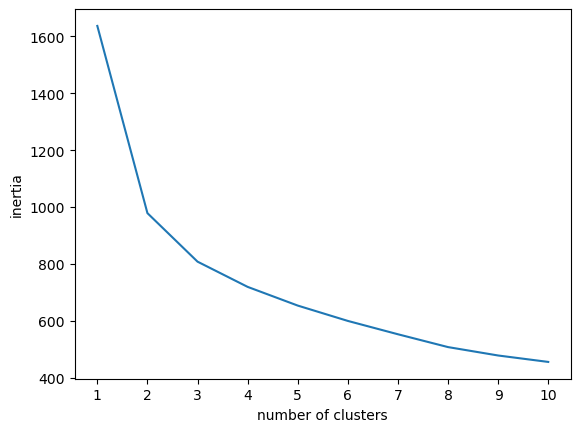

In [46]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [47]:
df_k4 = df_mnt_scaled.copy()
k4 = KMeans(n_clusters=4, random_state = 100).fit(df_mnt)

In [48]:
# DO IT
df_k4['k4_c'] = k4.labels_

In [49]:
#DO IT
df_k4.groupby(['k4_c']).mean().transpose()

k4_c,0,1,2,3
MntMeat&Fish,0.059052,0.298463,0.493163,0.356439
MntEntries,0.035186,0.187605,0.155749,0.464900
MntVegan&Vegetarian,0.036478,0.152907,0.185352,0.257226
MntDrinks,0.035288,0.208940,0.161450,0.463067
MntDesserts,0.035478,0.189748,0.149175,0.480990
MntAdditionalRequests,0.072971,0.598042,0.161728,0.277244


In [50]:
#DO IT
d4 = df_k4.groupby(['k4_c']).describe().transpose()
d4

k4_c                                   0           1            2            3
MntMeat&Fish          count  4008.000000  696.000000  1289.000000  1007.000000
                      mean      0.059052    0.298463     0.493163     0.356439
                      std       0.076604    0.192136     0.191342     0.190194
                      min       0.000000    0.005340     0.044126     0.006676
                      25%       0.006676    0.156041     0.358478     0.216288
                      50%       0.022697    0.264352     0.471963     0.327770
                      75%       0.089453    0.404206     0.618158     0.473298
                      max       0.387183    0.991989     1.000000     0.988652
MntEntries            count  4008.000000  696.000000  1289.000000  1007.000000
                      mean      0.035186    0.187605     0.155749     0.464900
                      std       0.056122    0.165623     0.135658     0.257803
                      min       0.000000    0.000000     0.000000     0.000000
                      25%       0.005025    0.065327     0.055276     0.251256
                      50%       0.015075    0.140704     0.125628     0.447236
                      75%       0.040201    0.271357     0.221106     0.663317
                      max       0.592965    0.964824     0.768844     1.000000
MntVegan&Vegetarian   count  4008.000000  696.000000  1289.000000  1007.000000
                      mean      0.036478    0.152907     0.185352     0.257226
                      std       0.114118    0.122758     0.138238     0.138118
                      min       0.000000    0.006930     0.004620     0.031185
                      25%       0.005198    0.063458     0.081428     0.143798
                      50%       0.011550    0.110591     0.144953     0.245438
                      75%       0.030608    0.207178     0.258720     0.354297
                      max       1.000000    0.564218     0.992088     0.576923
MntDrinks             count  4008.000000  696.000000  1289.000000  1007.000000
                      mean      0.035288    0.208940     0.161450     0.463067
                      std       0.056943    0.190650     0.150618     0.257838
                      min       0.000000    0.000000     0.000000     0.000000
                      25%       0.005025    0.065327     0.050251     0.251256
                      50%       0.015075    0.150754     0.120603     0.442211
                      75%       0.040201    0.301508     0.231156     0.663317
                      max       0.592965    0.944724     0.989950     1.000000
MntDesserts           count  4008.000000  696.000000  1289.000000  1007.000000
                      mean      0.035478    0.189748     0.149175     0.480990
                      std       0.055840    0.171196     0.133962     0.255731
                      min       0.000000    0.000000     0.000000     0.000000
                      25%       0.005025    0.060302     0.050251     0.266332
                      50%       0.015075    0.135678     0.115578     0.482412
                      75%       0.040327    0.276382     0.226131     0.688442
                      max       0.597990    0.944724     0.708543     1.000000
MntAdditionalRequests count  4008.000000  696.000000  1289.000000  1007.000000
                      mean      0.072971    0.598042     0.161728     0.277244
                      std       0.077970    0.181343     0.108371     0.196955
                      min       0.000000    0.232932     0.000000     0.000000
                      25%       0.016466    0.449799     0.076305     0.128514
                      50%       0.044177    0.566265     0.140562     0.224900
                      75%       0.100402    0.730924     0.228916     0.375502
                      max       0.445783    1.000000     0.642570     1.000000

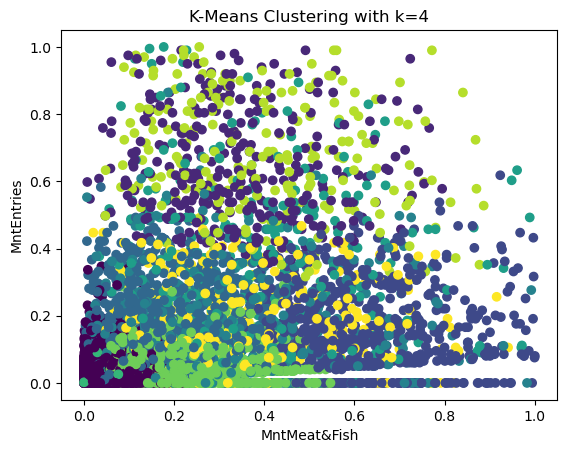

In [51]:
import matplotlib.pyplot as plt

# Select two variables to plot
x_var = 'MntMeat&Fish'
y_var = 'MntEntries'

# Create scatter plot with color-coded clusters
plt.scatter(df_k4[x_var], df_k4[y_var], c=kmeans.labels_)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('K-Means Clustering with k=4')
plt.show()

In [52]:
#minmax doesn't work

In [53]:
#We need to choose which columns to use

In [54]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of parameter values to try
eps_values = [0.1, 0.5, 1, 2, 5, 10, 0.001]
min_samples_values = [2, 5, 10, 20, 30]

# Find the optimal parameter values using the silhouette score
best_score = -1
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df_mnt)
        labels = dbscan.labels_
        if len(set(labels)) > 1:
            score = silhouette_score(df_mnt, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Fit the DBSCAN model with the optimal parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(df_mnt)
labels = dbscan.labels_

# Print the number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Number of clusters: {}'.format(n_clusters))
print('Number of noise points: {}'.format(n_noise))


Number of clusters: 2
Number of noise points: 0


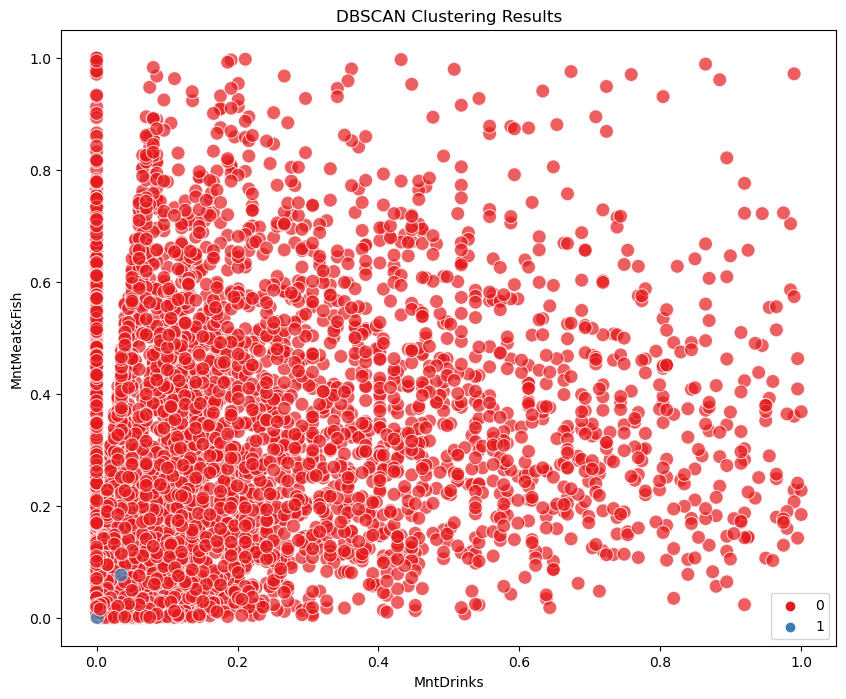

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit DBSCAN model with optimal parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(df_mnt)
labels = dbscan.labels_

# Plot clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='MntDrinks', y='MntMeat&Fish', hue=labels, data=df_mnt, palette='Set1', s=100, alpha=0.7)
plt.title('DBSCAN Clustering Results')
plt.xlabel('MntDrinks')
plt.ylabel('MntMeat&Fish')
plt.show()

In [56]:
#let's transform

df_mnt

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests
0,0.482644,0.457286,0.132248,0.402010,0.110553,0.228916
1,0.390521,0.080402,0.105683,0.125628,0.080402,0.032129
2,0.559413,0.000000,0.060060,0.000000,0.000000,0.112450
3,0.339786,0.070352,0.090668,0.035176,0.140704,0.313253
4,0.022029,0.000000,0.009240,0.000000,0.000000,0.028112
...,...,...,...,...,...,...
6995,0.019359,0.005025,0.006930,0.000000,0.010050,0.016064
6996,0.015354,0.020101,0.020213,0.005025,0.020101,0.092369
6997,0.203605,0.618090,0.147840,0.452261,0.246231,0.429719
6998,0.001335,0.050251,0.003465,0.040201,0.000000,0.056225


In [57]:
df_mnt2=df_mnt.copy()

In [58]:
df_mnt2['extras'] = df_mnt2['MntEntries'] + df_mnt2['MntDesserts']


In [59]:
df_mnt2 = df_mnt2.drop(['MntEntries', 'MntDesserts'], axis=1)


In [60]:
df_mnt2

,MntMeat&Fish,MntVegan&Vegetarian,MntDrinks,MntAdditionalRequests,extras
0,0.482644,0.132248,0.402010,0.228916,0.567839
1,0.390521,0.105683,0.125628,0.032129,0.160804
2,0.559413,0.060060,0.000000,0.112450,0.000000
3,0.339786,0.090668,0.035176,0.313253,0.211055
4,0.022029,0.009240,0.000000,0.028112,0.000000
...,...,...,...,...,...
6995,0.019359,0.006930,0.000000,0.016064,0.015075
6996,0.015354,0.020213,0.005025,0.092369,0.040201
6997,0.203605,0.147840,0.452261,0.429719,0.864322
6998,0.001335,0.003465,0.040201,0.056225,0.050251


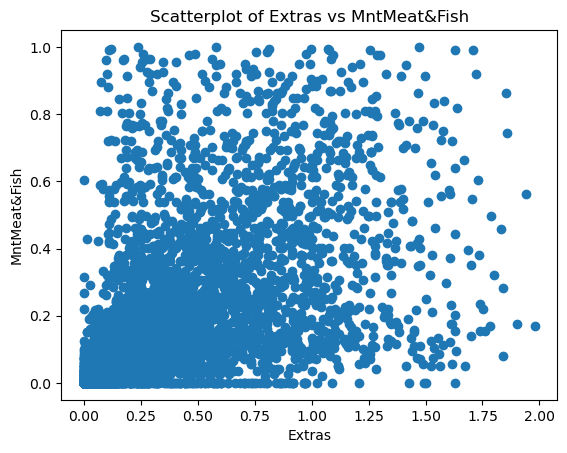

In [61]:
import matplotlib.pyplot as plt

# Extract the columns of interest
extras = df_mnt2['extras']
meat_fish = df_mnt2['MntDrinks']

# Create the scatterplot
plt.scatter(extras, meat_fish)

# Set the axis labels and title
plt.xlabel('Extras')
plt.ylabel('MntMeat&Fish')
plt.title('Scatterplot of Extras vs MntMeat&Fish')

# Show the plot
plt.show()

In [62]:
df_mnt2['mains'] = df_mnt2['MntMeat&Fish'] + df_mnt2['MntVegan&Vegetarian']

In [63]:
df_mnt2 = df_mnt2.drop(['MntMeat&Fish', 'MntVegan&Vegetarian'], axis=1)

In [64]:
df_mnt2

,MntDrinks,MntAdditionalRequests,extras,mains
0,0.402010,0.228916,0.567839,0.614891
1,0.125628,0.032129,0.160804,0.496203
2,0.000000,0.112450,0.000000,0.619473
3,0.035176,0.313253,0.211055,0.430454
4,0.000000,0.028112,0.000000,0.031269
...,...,...,...,...
6995,0.000000,0.016064,0.015075,0.026289
6996,0.005025,0.092369,0.040201,0.035566
6997,0.452261,0.429719,0.864322,0.351445
6998,0.040201,0.056225,0.050251,0.004800


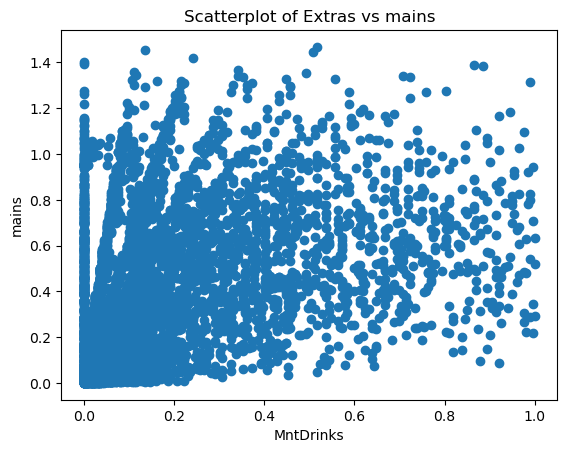

In [65]:
# Extract the columns of interest
extras = df_mnt2['MntDrinks']
meat_fish = df_mnt2['mains']

# Create the scatterplot
plt.scatter(extras, meat_fish)

# Set the axis labels and title
plt.xlabel('MntDrinks')
plt.ylabel('mains')
plt.title('Scatterplot of Extras vs mains')

# Show the plot
plt.show()

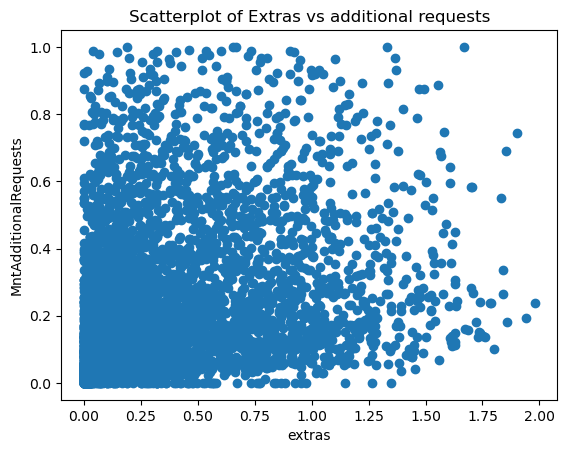

In [66]:
# Extract the columns of interest
extras = df_mnt2['extras']
meat_fish = df_mnt2['MntAdditionalRequests']

# Create the scatterplot
plt.scatter(extras, meat_fish)

# Set the axis labels and title
plt.xlabel('extras')
plt.ylabel('MntAdditionalRequests')
plt.title('Scatterplot of Extras vs additional requests')

# Show the plot
plt.show()

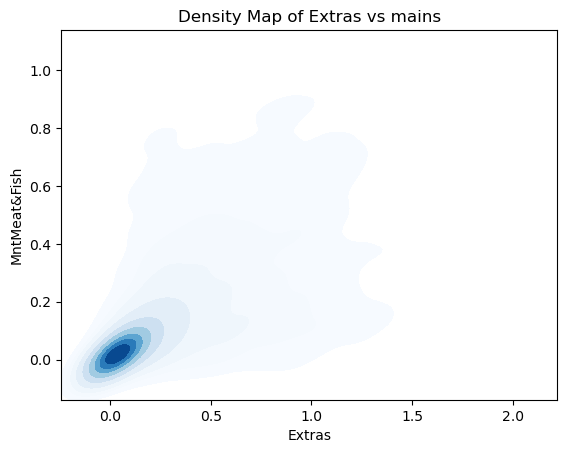

In [67]:
import seaborn as sns

# Extract the columns of interest
extras = df_mnt2['extras']
meat_fish = df_mnt2['MntDrinks']

# Create the density map
sns.kdeplot(x=extras, y=meat_fish, cmap='Blues', shade=True)

# Set the axis labels and title
plt.xlabel('Extras')
plt.ylabel('MntMeat&Fish')
plt.title('Density Map of Extras vs mains')

# Show the plot
plt.show()


In [68]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Extract the columns of interest
X = df_mnt2

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Instantiate and fit the DBSCAN model
dbscan = DBSCAN(eps=0.74, min_samples=31, metric='euclidean')
dbscan.fit(X)

# Add the cluster labels to the dataframe
df_mnt2['cluster'] = dbscan.labels_

# Print the number of clusters and cluster labels
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print('Number of clusters:', n_clusters)
print('Cluster labels:', dbscan.labels_)


Number of clusters: 1
Cluster labels: [ 0  0  0 ... -1  0  0]


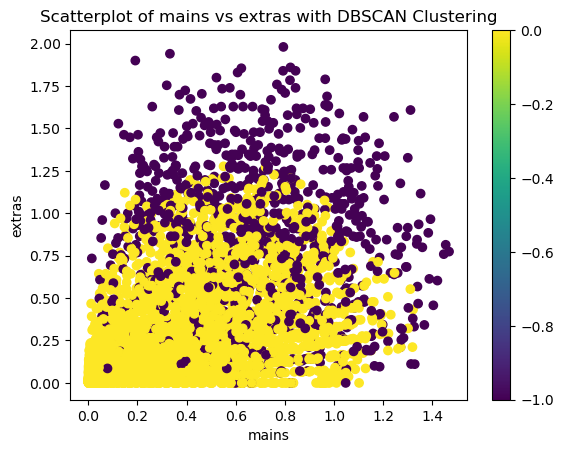

In [69]:
import matplotlib.pyplot as plt

# Set the x and y variables
x_var = 'mains'
y_var = 'extras'

# Create the scatterplot
plt.scatter(df_mnt2[x_var], df_mnt2[y_var], c=df_mnt2['cluster'], cmap='viridis')
plt.colorbar()

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()


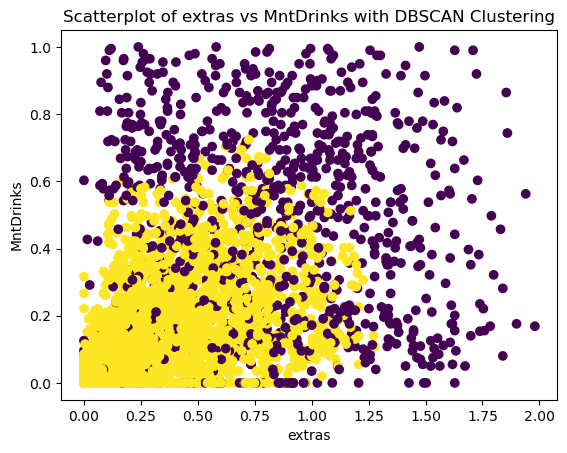

In [70]:
import matplotlib.pyplot as plt

# Set the columns of interest and the cluster label column
x_var = 'extras'
y_var = 'MntDrinks'
cluster_var = 'cluster'

# Create the scatterplot with cluster labels as colors
plt.scatter(df_mnt2[x_var], df_mnt2[y_var], c=df_mnt2[cluster_var], cmap='viridis')

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()


In [71]:
# Count the number of points in each cluster
cluster_counts = df_mnt2['cluster'].value_counts()

# Print the number of points in cluster -1
n_noise = cluster_counts[-1]
print('Number of noise points:', n_noise)

Number of noise points: 963


In [72]:
# Count the number of points in each cluster
cluster_counts = df_mnt2['cluster'].value_counts()

# Print the number of points in each cluster
for cluster_id, n_points in cluster_counts.iteritems():
    print(f"Cluster {cluster_id}: {n_points} points")


Cluster 0: 6037 points
Cluster -1: 963 points


In [73]:
# Compute summary statistics for each cluster
cluster_stats = df_mnt2.groupby('cluster').agg(['mean', 'median', 'std', 'count'])

cluster_stats

MntDrinks                           MntAdditionalRequests            \
             mean    median       std count                  mean    median   
cluster                                                                       
-1       0.468267  0.467337  0.282235   963              0.458032  0.445783   
 0       0.084534  0.030151  0.120969  6037              0.125108  0.076305   

                           extras                               mains  \
              std count      mean    median       std count      mean   
cluster                                                                 
-1       0.269524   963  0.809469  0.814070  0.438661   963  0.660459   
 0       0.138837  6037  0.184180  0.070352  0.245901  6037  0.257343   

                                   
           median       std count  
cluster                            
-1       0.644155  0.311246   963  
 0       0.130492  0.290648  6037

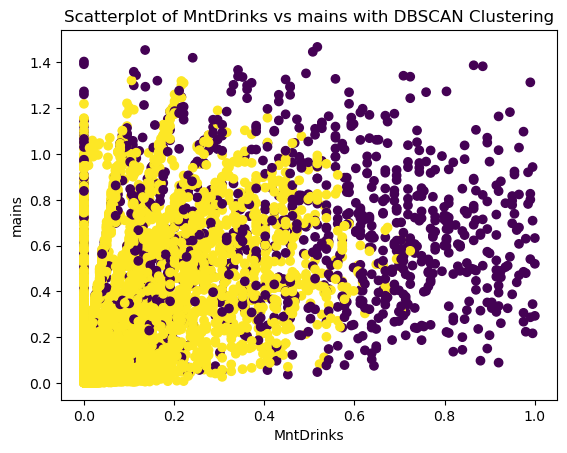

In [74]:
import matplotlib.pyplot as plt

# Set the columns of interest and the cluster label column
x_var = 'MntDrinks'
y_var = 'mains'
cluster_var = 'cluster'

# Create the scatterplot with cluster labels as colors
plt.scatter(df_mnt2[x_var], df_mnt2[y_var], c=df_mnt2[cluster_var], cmap='viridis')

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()

In [75]:
#DO IT
df_mnt2.groupby(['cluster']).describe().transpose()

cluster                              -1            0
MntDrinks             count  963.000000  6037.000000
                      mean     0.468267     0.084534
                      std      0.282235     0.120969
                      min      0.000000     0.000000
                      25%      0.216080     0.005025
                      50%      0.467337     0.030151
                      75%      0.698492     0.115578
                      max      1.000000     0.723618
MntAdditionalRequests count  963.000000  6037.000000
                      mean     0.458032     0.125108
                      std      0.269524     0.138837
                      min      0.000000     0.000000
                      25%      0.218876     0.028112
                      50%      0.445783     0.076305
                      75%      0.682731     0.172691
                      max      1.000000     0.875502
extras                count  963.000000  6037.000000
                      mean     0.809469     0.184180
                      std      0.438661     0.245901
                      min      0.000000     0.000000
                      25%      0.454774     0.020101
                      50%      0.814070     0.070352
                      75%      1.118090     0.256281
                      max      1.979899     1.276382
mains                 count  963.000000  6037.000000
                      mean     0.660459     0.257343
                      std      0.311246     0.290648
                      min      0.014273     0.000000
                      25%      0.416242     0.022501
                      50%      0.644155     0.130492
                      75%      0.870931     0.428194
                      max      1.467888     1.321501

In [114]:
#BACK TO OG DATA SET


from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Extract the columns of interest
X = df_mnt

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Instantiate and fit the DBSCAN model
dbscan = DBSCAN(eps=0.77, min_samples=29, metric='euclidean')
dbscan.fit(X)

# Add the cluster labels to the dataframe
df_mnt['cluster_'] = dbscan.labels_

# Print the number of clusters and cluster labels
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print('Number of clusters:', n_clusters)
print('Cluster labels:', dbscan.labels_)

Number of clusters: 3
Cluster labels: [-1  0  0 ... -1  1  1]


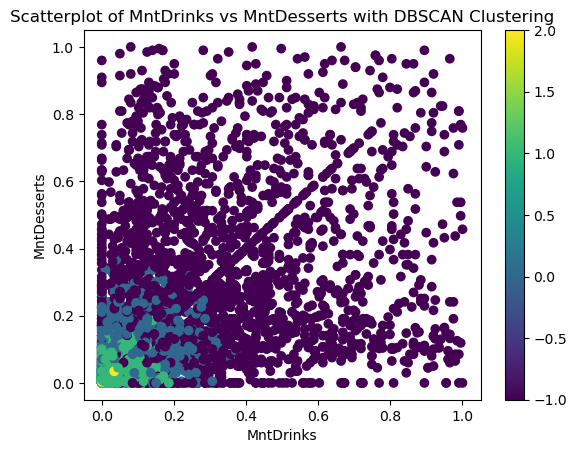

In [115]:
import matplotlib.pyplot as plt

# Set the x and y variables
x_var = 'MntDrinks'
y_var = 'MntDesserts'

# Create the scatterplot
plt.scatter(df_mnt[x_var], df_mnt[y_var], c=df_mnt['cluster_'], cmap='viridis')
plt.colorbar()

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()

In [116]:
# Compute summary statistics for each cluster
ogcluster = df_mnt.groupby('cluster_').agg(['mean', 'median', 'std', 'count'])

ogcluster

MntMeat&Fish                           MntEntries            \
                 mean    median       std count       mean    median   
cluster_                                                               
-1           0.389557  0.357477  0.224011  2352   0.322435  0.266332   
 0           0.313882  0.296395  0.188292  1112   0.092346  0.075377   
 1           0.049691  0.018024  0.071302  3473   0.022693  0.010553   
 2           0.018714  0.008745  0.022556    63   0.010258  0.002010   

                         MntVegan&Vegetarian            ... MntDrinks        \
               std count                mean    median  ...       std count   
cluster_                                                ...                   
-1        0.239946  2352            0.230851  0.209633  ...  0.244910  2352   
 0        0.076334  1112            0.083106  0.072188  ...  0.078653  1112   
 1        0.029252  3473            0.015826  0.009240  ...  0.029175  3473   
 2        0.016835    63            0.956054  0.950393  ...  0.020250    63   

         MntDesserts                           MntAdditionalRequests  \
                mean    median       std count                  mean   
cluster_                                                               
-1          0.326567  0.266332  0.245966  2352              0.317305   
 0          0.092000  0.080402  0.075135  1112              0.214235   
 1          0.022966  0.010553  0.028961  3473              0.060672   
 2          0.011973  0.003015  0.020483    63              0.017703   

                                    
            median       std count  
cluster_                            
-1        0.240964  0.244577  2352  
 0        0.172691  0.159355  1112  
 1        0.040161  0.061720  3473  
 2        0.009237  0.023758    63  

[4 rows x 24 columns]

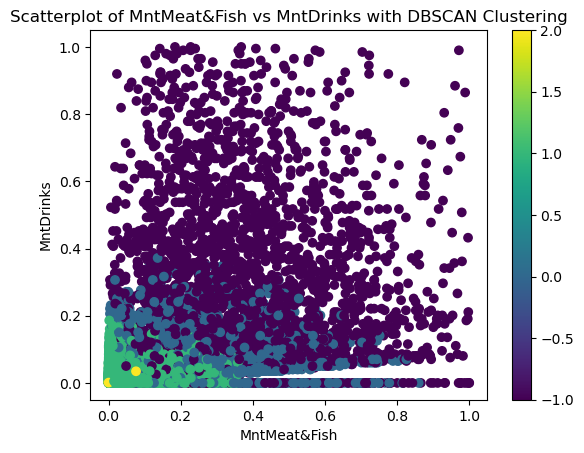

In [117]:
import matplotlib.pyplot as plt

# Set the x and y variables
x_var = 'MntMeat&Fish'
y_var = 'MntDrinks'

# Create the scatterplot
plt.scatter(df_mnt[x_var], df_mnt[y_var], c=df_mnt['cluster_'], cmap='viridis')
plt.colorbar()

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()